In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [3]:
bic=pd.read_json('fulldata.json')

In [4]:
state=pd.read_json('state.json')

In [5]:
bic['state']=state

In [6]:
bic.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount,state
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN,CO
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN,GA
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN,MA
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN,NY
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN,MO


In [7]:
bic.pop("location")
bic.pop("session_id")

0        69f62d2ae87640f5a2dde2b2e9229fe6
1        4459d001feb8438eae5f4ec24abcd992
2        0db9ed700a184d48a9d04806696e3642
3        68195e2372bd4022b17220fc21de9138
4        9508a8385dc94773baba8aa7d1c2aa75
                       ...               
49995    412b973788704c36a008a506cdbba033
49996    4addd36a6f4347c59865fe04a92e8d57
49997    3181a138a0b94d1da9a3d29f7816fcc7
49998    2df6b9a0c66b48a389330327517b9276
49999    fc24339bfda84ff29102981cbee78023
Name: session_id, Length: 50000, dtype: object

we dont have any roll for the session ids in data visulaising so we haved popped the session id

In [8]:
bic.head()

,category,event_name,gender,age,marital_status,device,client_time,amount,state
0,Sports,View Project,M,18-24,married,android,2014-03-01 00:00:04,NaN,CO
1,Technology,View Project,M,18-24,single,iOS,2014-03-01 00:00:22,NaN,GA
2,Environment,View Project,M,55+,single,iOS,2014-03-01 00:00:32,NaN,MA
3,Technology,View Project,M,18-24,single,android,2014-03-01 00:00:38,NaN,NY
4,Sports,View Project,F,25-34,married,iOS,2014-03-01 00:00:51,NaN,MO


In [9]:
bic.dropna()

,category,event_name,gender,age,marital_status,device,client_time,amount,state
11,Fashion,Fund Project,F,45-54,married,iOS,2014-03-01 00:02:42,61.0,IN
16,Sports,Fund Project,M,18-24,married,android,2014-03-01 00:03:20,31.0,CO
18,Technology,Fund Project,M,18-24,single,android,2014-03-01 00:03:31,39.0,CO
25,Technology,Fund Project,M,18-24,single,iOS,2014-03-01 00:04:04,36.0,GA
35,Sports,Fund Project,M,18-24,married,android,2014-03-01 00:06:35,40.0,OR
...,...,...,...,...,...,...,...,...,...
49989,Sports,Fund Project,M,18-24,single,iOS,2014-03-31 23:37:02,37.0,CO
49992,Fashion,Fund Project,M,18-24,married,android,2014-03-31 23:41:56,25.0,OR
49994,Environment,Fund Project,F,35-44,single,android,2014-03-31 23:48:20,35.0,FL
49995,Sports,Fund Project,F,18-24,married,iOS,2014-03-31 23:48:40,35.0,OR


 here we see that the people who funded the projects and 
now we will see some statistics of the amount 


In [13]:
bic.describe()

,amount
count,20658.000000
mean,39.407009
std,14.913658
min,1.000000
25%,29.000000
50%,39.000000
75%,50.000000
max,101.000000


In [14]:
df=bic.dropna()

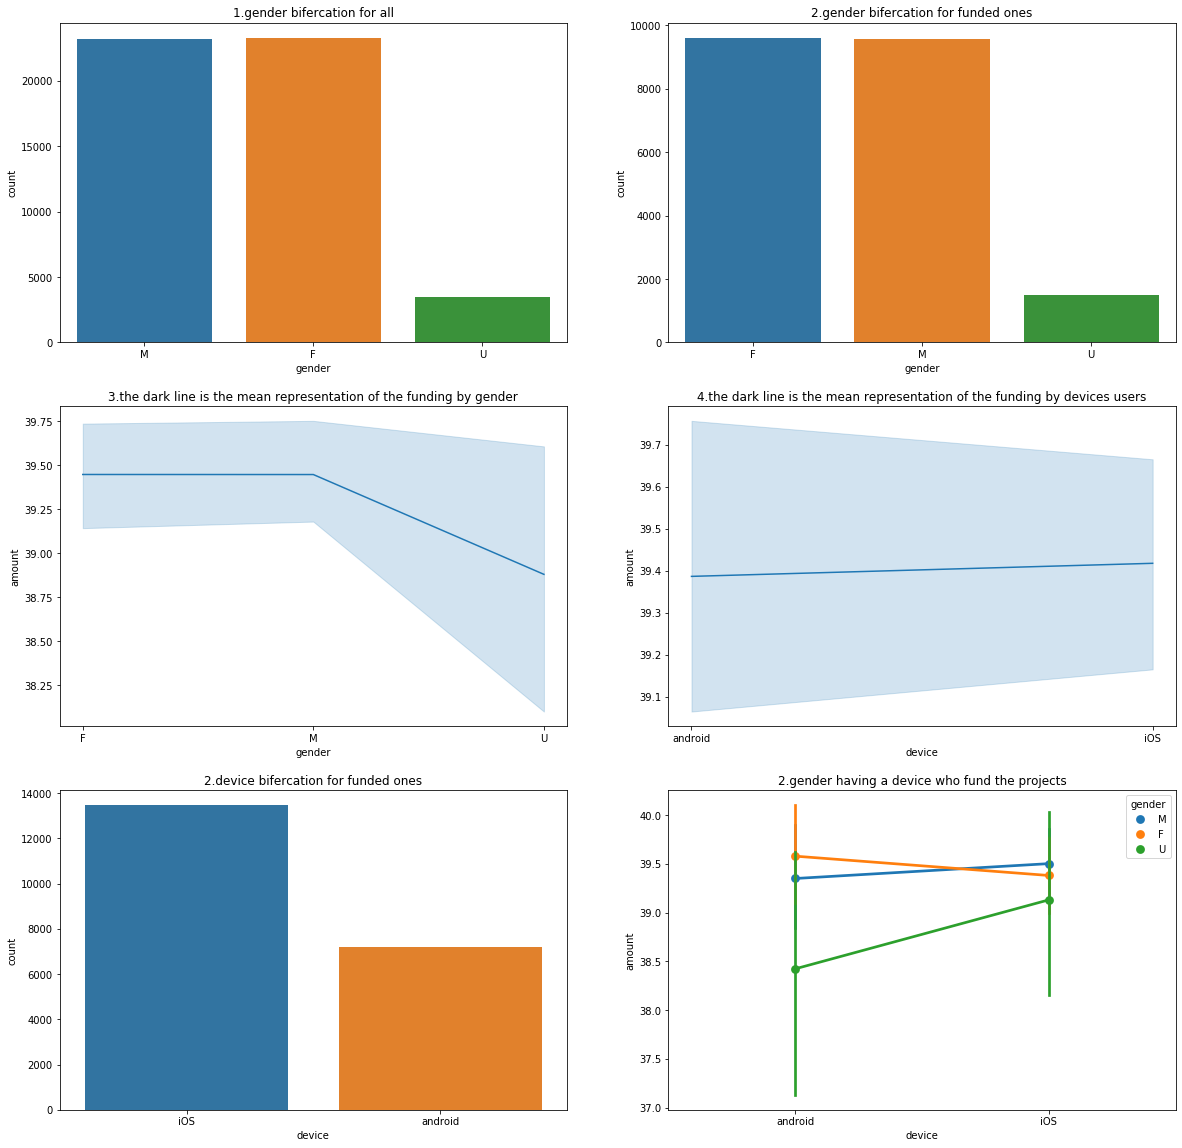

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes[0, 0].set_title('1.gender bifercation for all')
sns.countplot(ax=axes[0,1],x=df['gender'])
axes[0, 1].set_title('2.gender bifercation for funded ones')
sns.countplot(ax=axes[0,0],x=bic['gender']) 
axes[1, 0].set_title('3.the dark line is the mean representation of the funding by gender')
sns.lineplot(ax=axes[1,0],x=bic['gender'],y=bic['amount']) 
axes[1, 1].set_title('4.the dark line is the mean representation of the funding by devices users')
sns.lineplot(ax=axes[1,1],x=bic['device'],y=bic['amount']) 
axes[2, 0].set_title('2.device bifercation for funded ones')
sns.countplot(ax=axes[2,0],x=df['device']) 
axes[2, 1].set_title('2.gender having a device who fund the projects')
sns.pointplot(ax=axes[2,1],x=bic['device'],y=bic['amount'],hue=bic['gender'])

here in the first second graph we get general ideas on the basis of gender how many fund and view
 in 3 4 plot we get a dark blue line which is the mean line of the amount related with gender and device
 in 5 and 6 we see ios and android users related to amount
 we see ios users are more for female android user the mean funding amount is more  where as male ios users  funding amount
 is more 

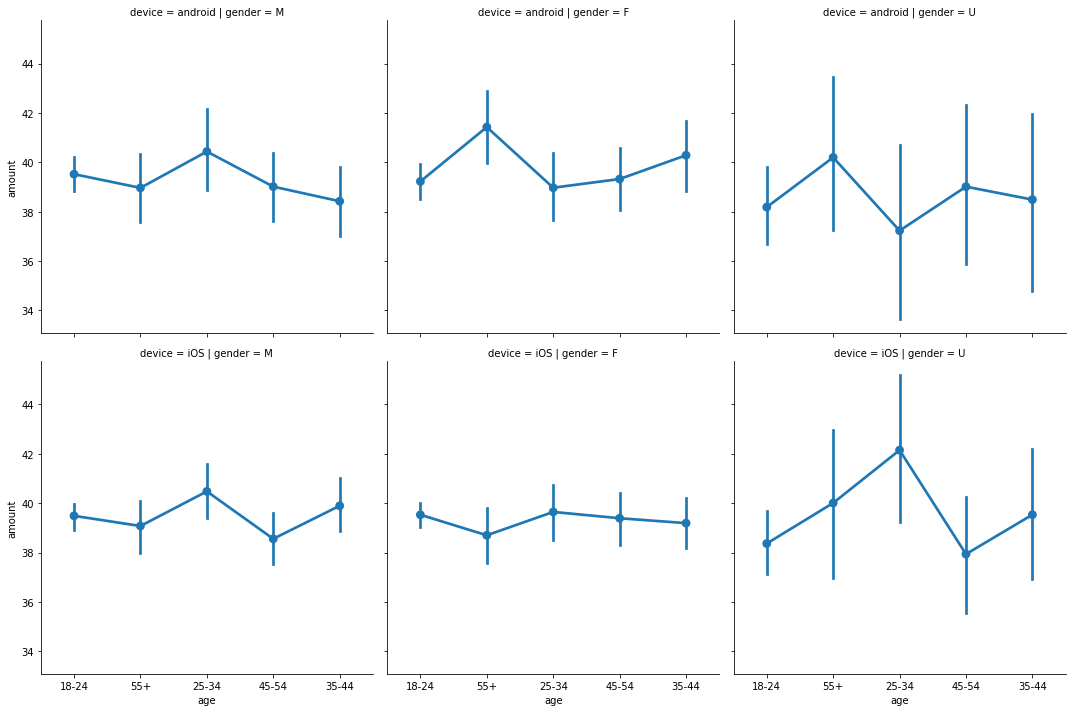

In [16]:
sns.catplot(x="age", y="amount", col="gender",row='device', kind="point", data=bic)

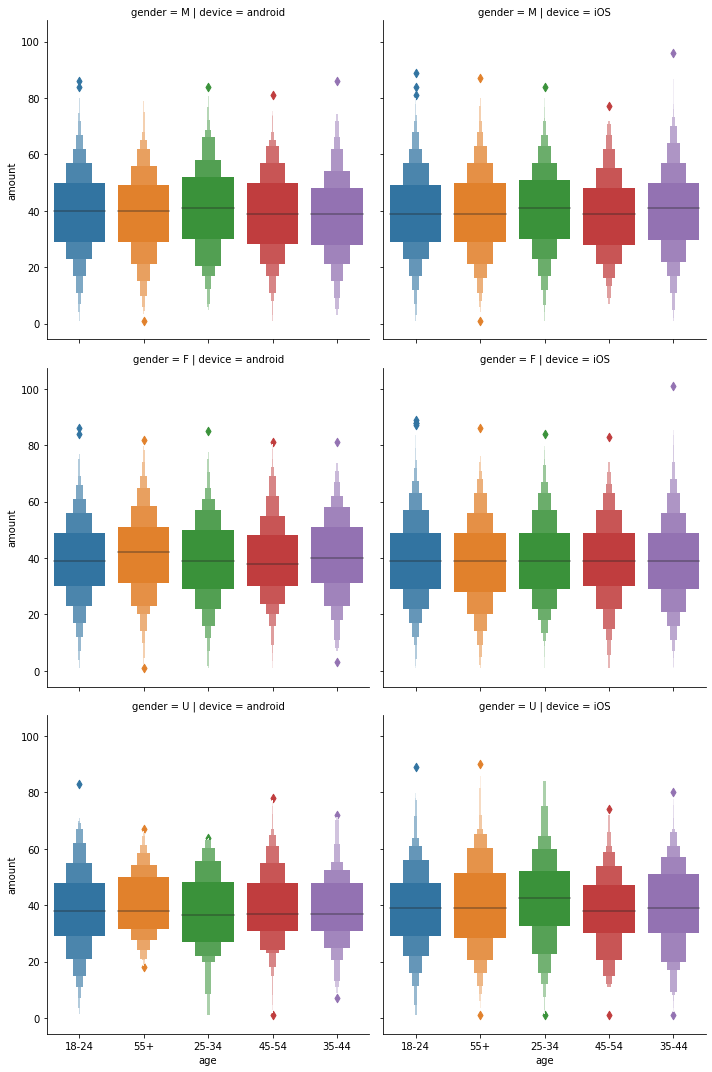

In [65]:
sns.catplot(x="age", y="amount", col="device",row='gender', kind="boxen", data=bic)

here the relations are between device gender and age the point is the mean and the vertical is the error we see and 
 In box plot we see the box is where the major values lies the line is the mean and there are some outlying values

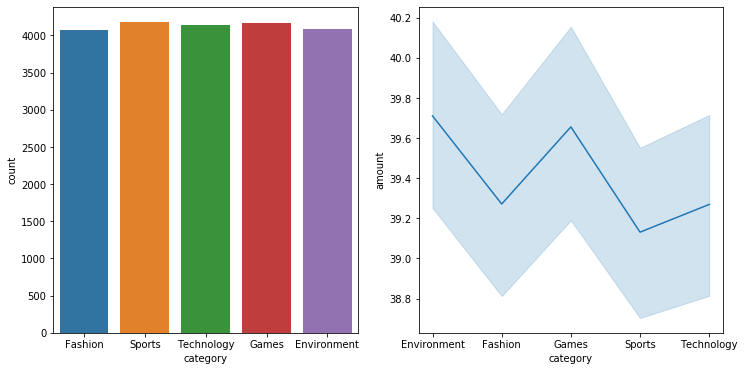

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.countplot(ax=axes[0],x=df['category']) 
sns.lineplot(ax=axes[1],data=bic,x="category", y="amount")



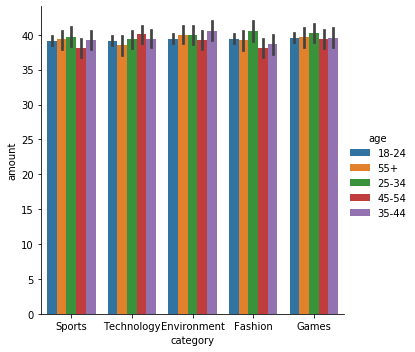

In [53]:
sns.catplot(hue="age", y="amount", x="category", kind="bar", data=bic)

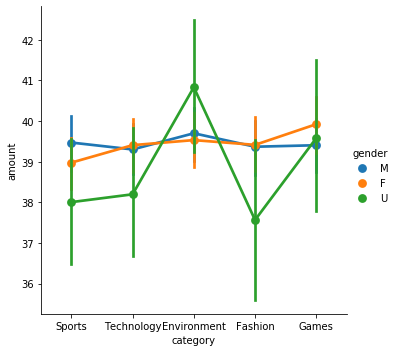

In [20]:
sns.catplot(hue="gender", y="amount", x="category", kind="point", data=bic)

now we observe categories with age and gender 

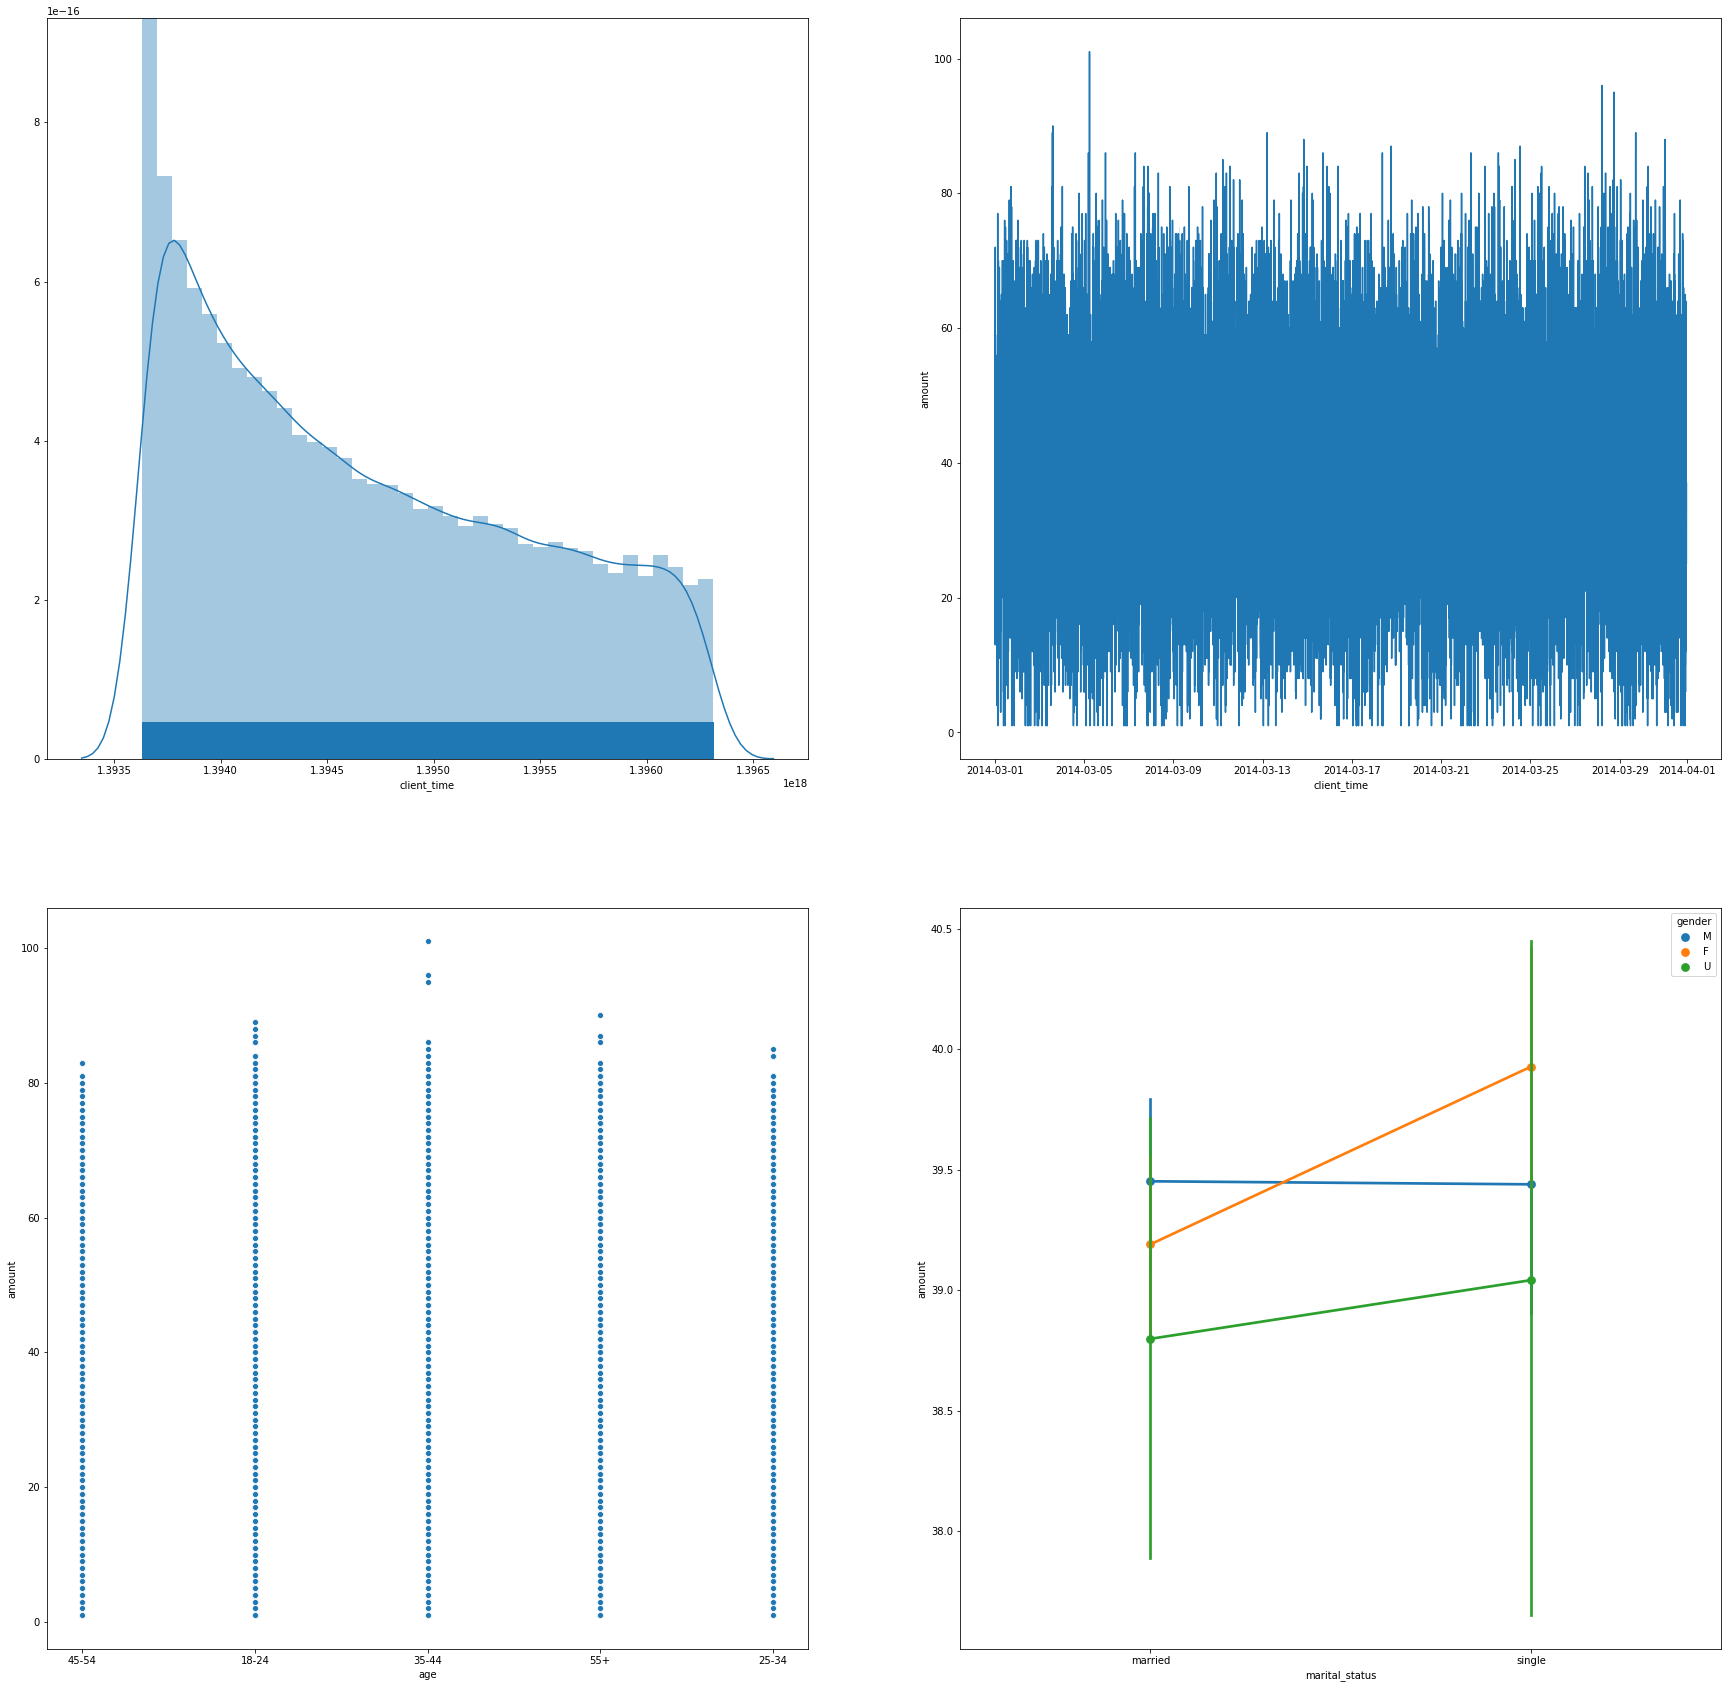

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(30,30))
sns.distplot(bic['client_time'],ax=axes[0,0],rug='true')
sns.lineplot(ax=axes[0,1],data=bic,x="client_time",y="amount")
sns.scatterplot('age','amount',ax=axes[1,0],data=df)
sns.pointplot(ax=axes[1,1],x=bic['marital_status'],y=bic['amount'],hue=bic['gender'])


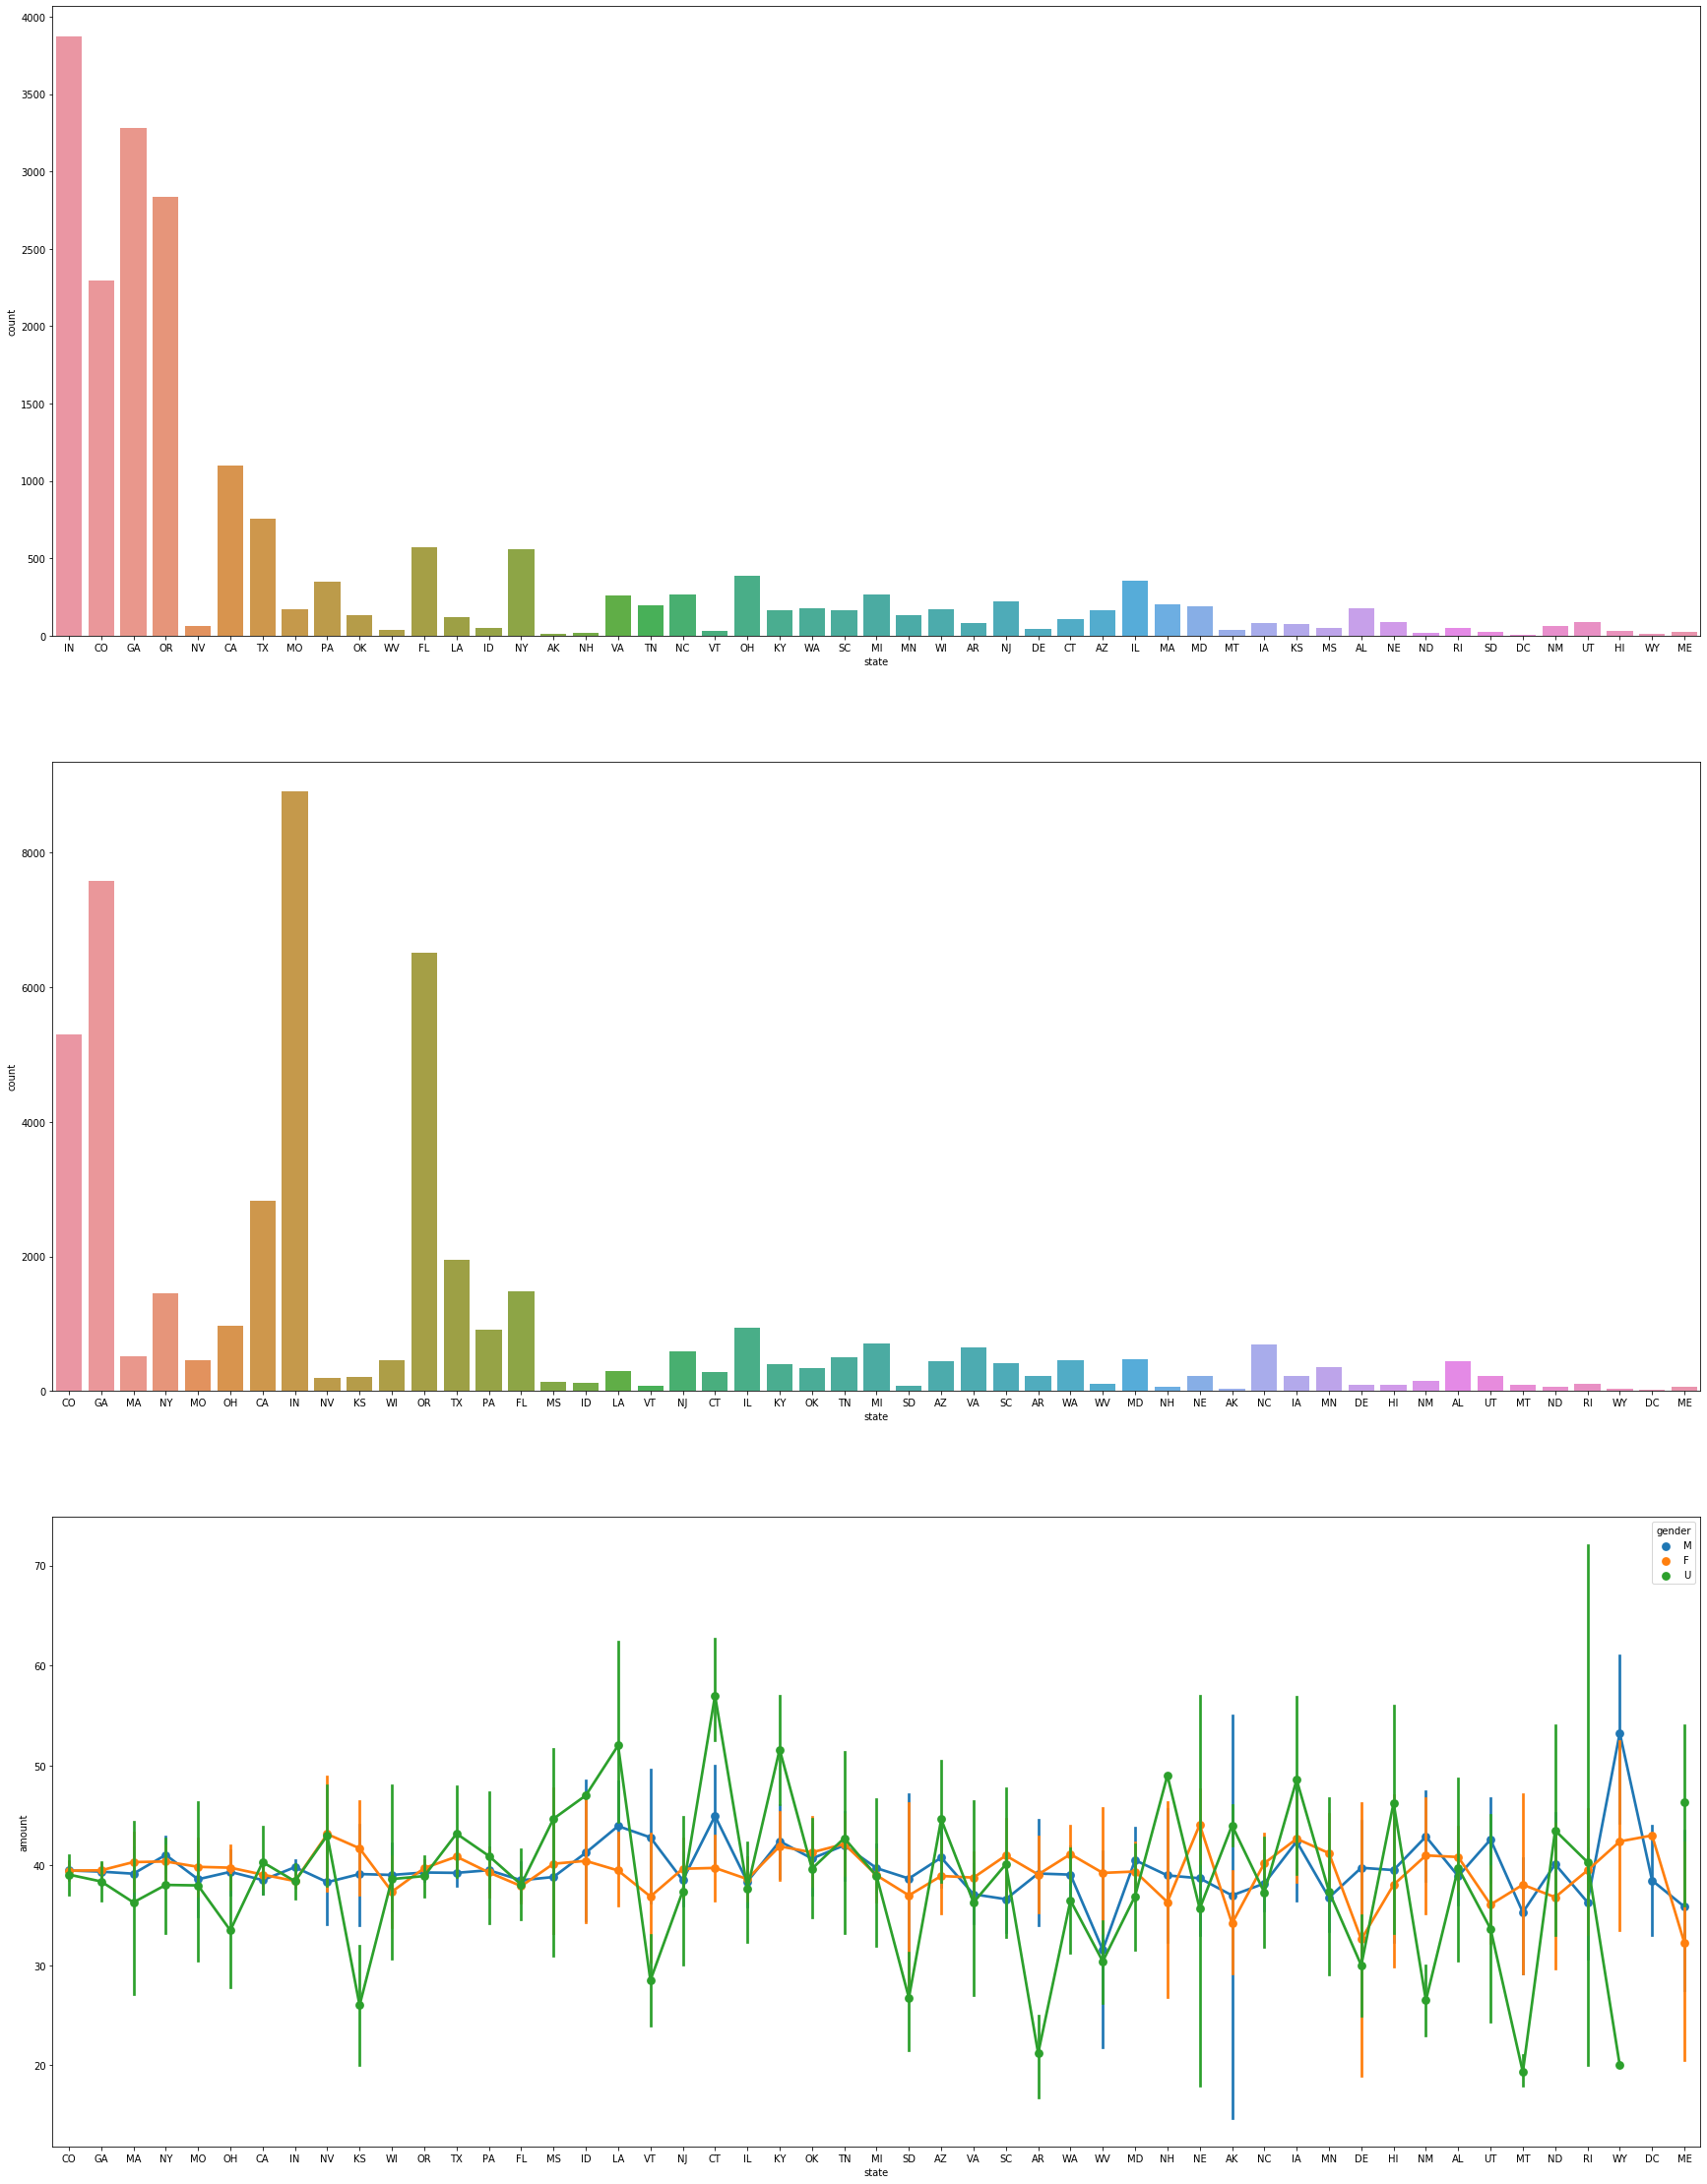

In [54]:
fig, axes = plt.subplots(3,1, figsize=(30,40))
sns.countplot(ax=axes[0],x=df['state']) 
sns.countplot(ax=axes[1],x=bic['state']) 
sns.pointplot(ax=axes[2],x=bic['state'],y=bic['amount'],hue=bic['gender'])

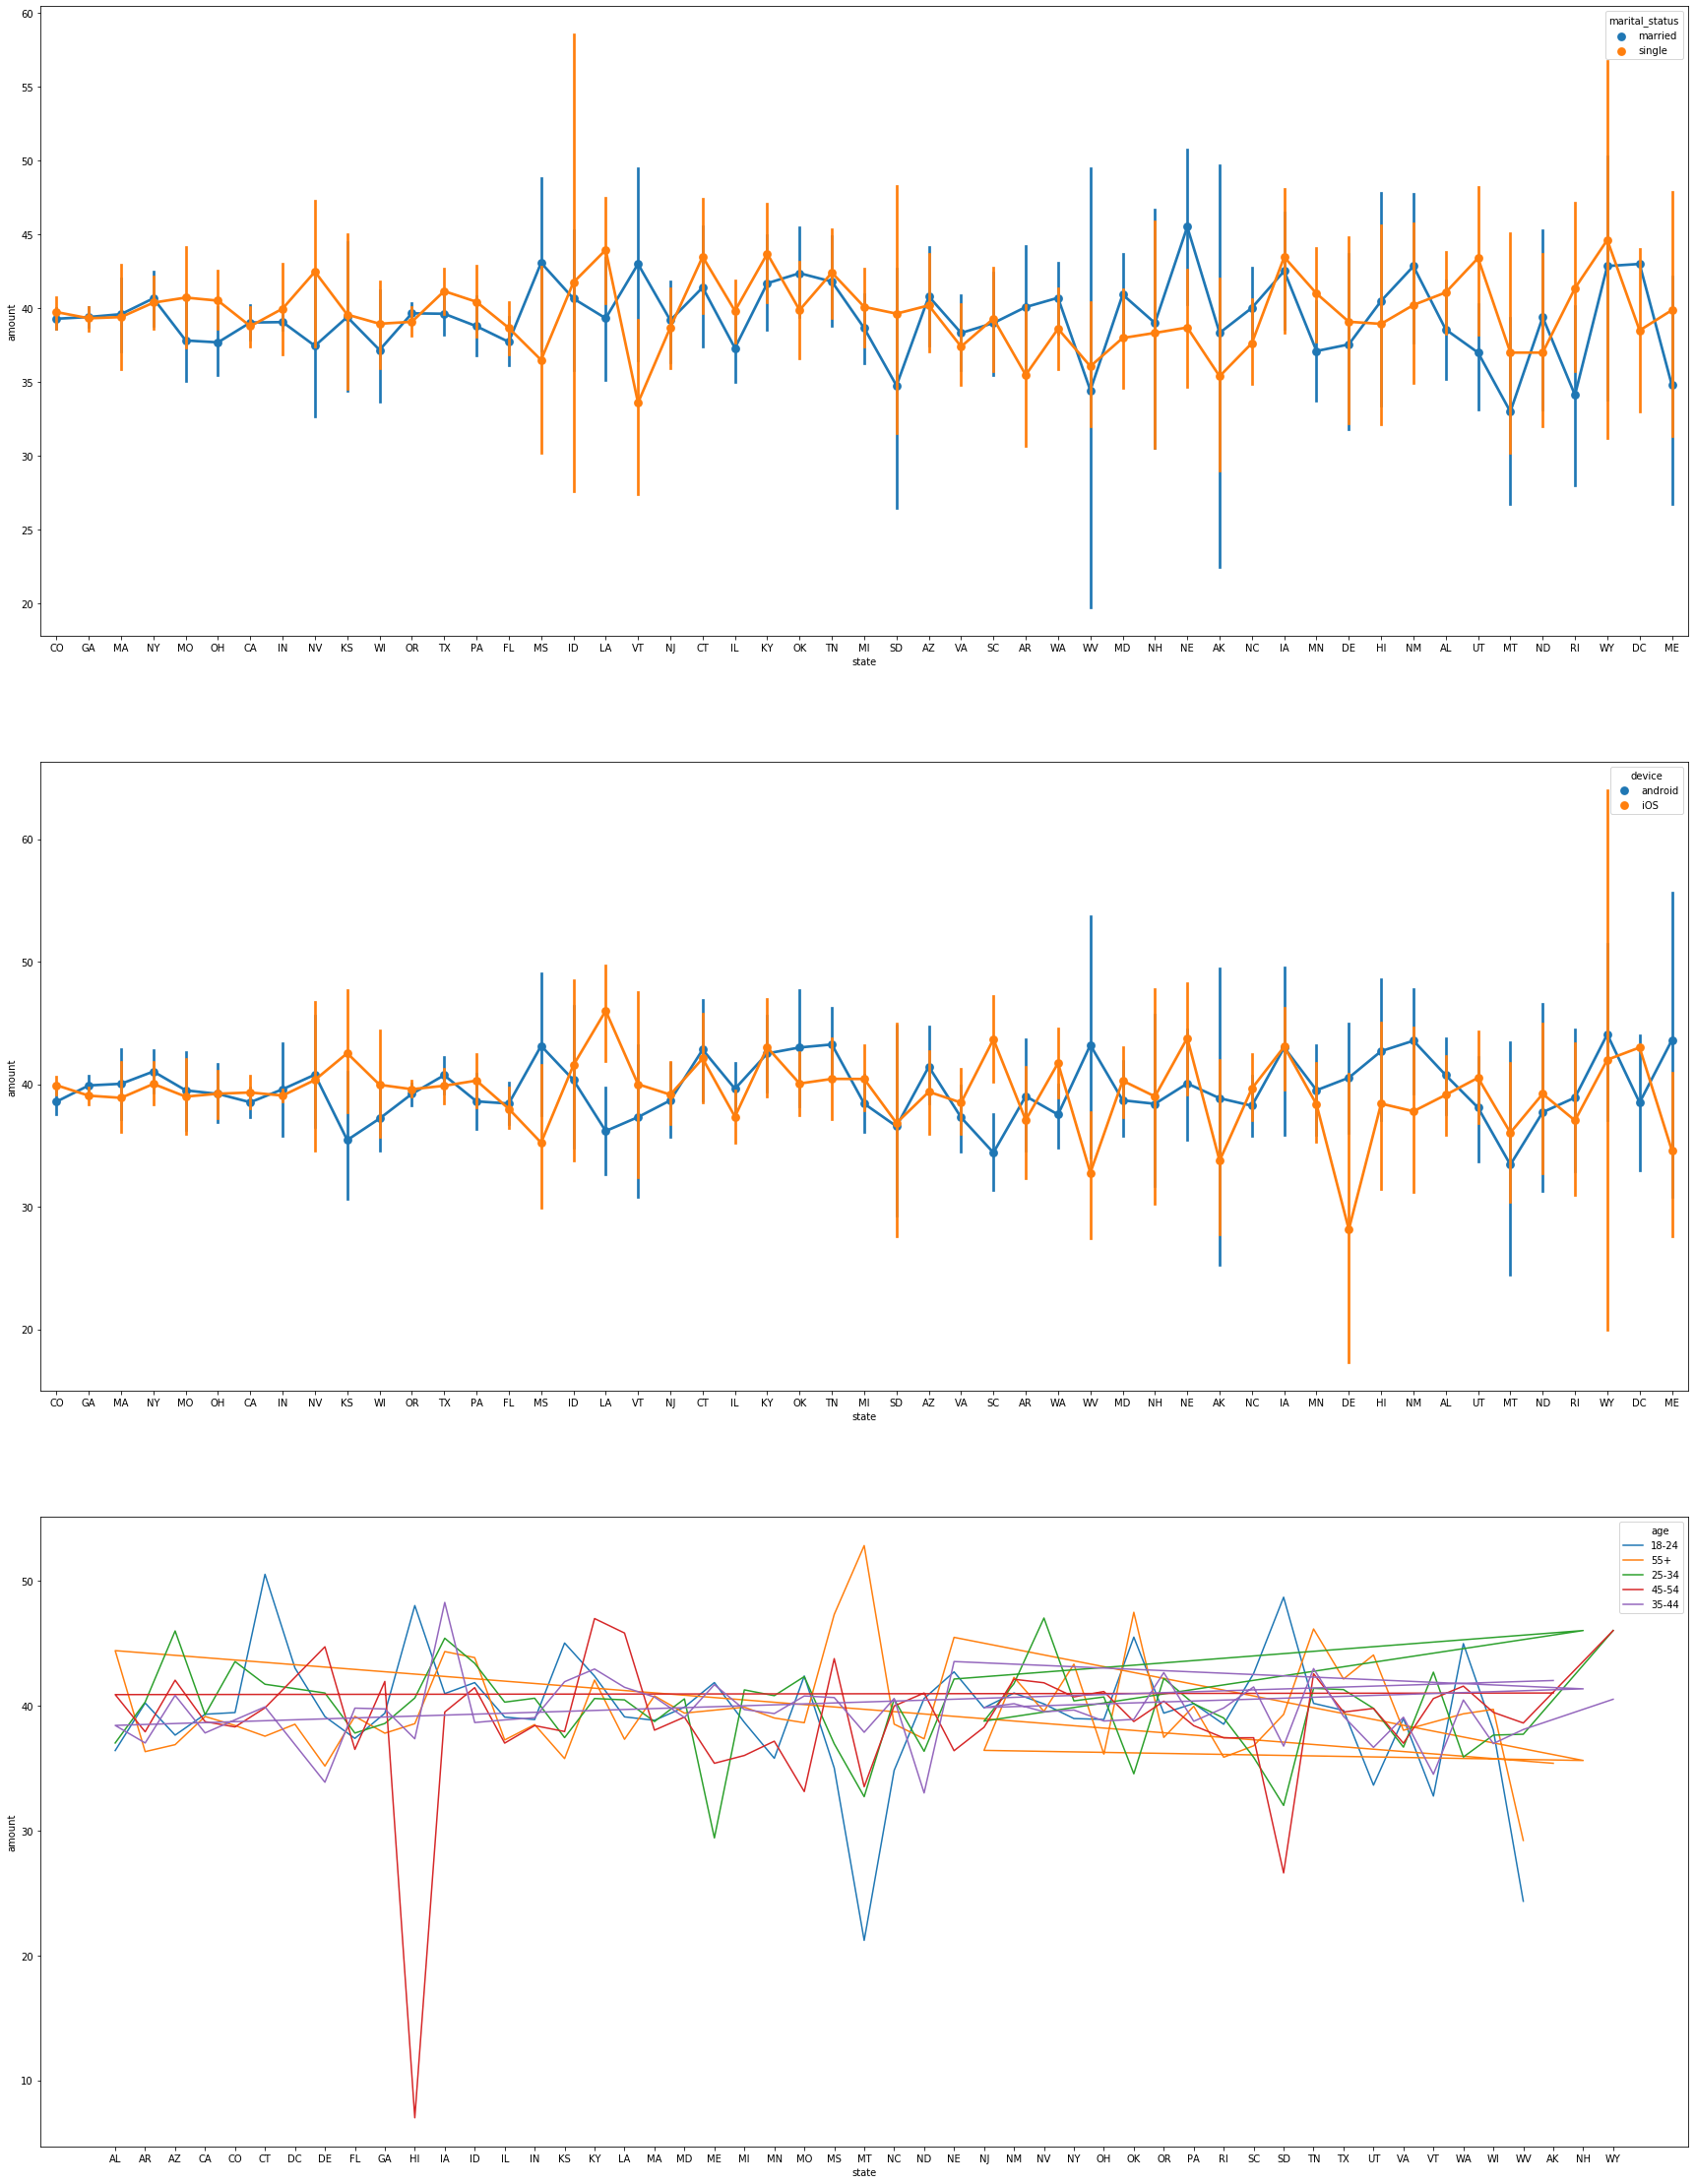

In [74]:
fig, axes = plt.subplots(3,1, figsize=(30,40))
sns.pointplot(ax=axes[0],y=bic['amount'],x=bic['state'],hue=bic['marital_status'])
sns.pointplot(ax=axes[1],y=bic['amount'],x=bic['state'],hue=bic['device'])
sns.lineplot(ax=axes[2],y='amount',x='state',hue='age',ci=None,data=bic)


In [19]:
df.loc[df['state'] =='IN']

,category,event_name,gender,age,marital_status,device,client_time,amount,state
11,Fashion,Fund Project,F,45-54,married,iOS,2014-03-01 00:02:42,61.0,IN
65,Fashion,Fund Project,F,45-54,married,iOS,2014-03-01 00:13:34,56.0,IN
158,Games,Fund Project,M,55+,married,iOS,2014-03-01 00:36:31,72.0,IN
244,Technology,Fund Project,M,18-24,married,iOS,2014-03-01 00:57:38,48.0,IN
263,Fashion,Fund Project,F,25-34,married,iOS,2014-03-01 01:02:45,46.0,IN
...,...,...,...,...,...,...,...,...,...
49963,Technology,Fund Project,F,25-34,married,iOS,2014-03-31 23:00:42,18.0,IN
49972,Fashion,Fund Project,M,25-34,married,iOS,2014-03-31 23:11:29,62.0,IN
49978,Fashion,Fund Project,F,35-44,married,iOS,2014-03-31 23:21:03,48.0,IN
49985,Games,Fund Project,M,25-34,married,iOS,2014-03-31 23:32:16,38.0,IN


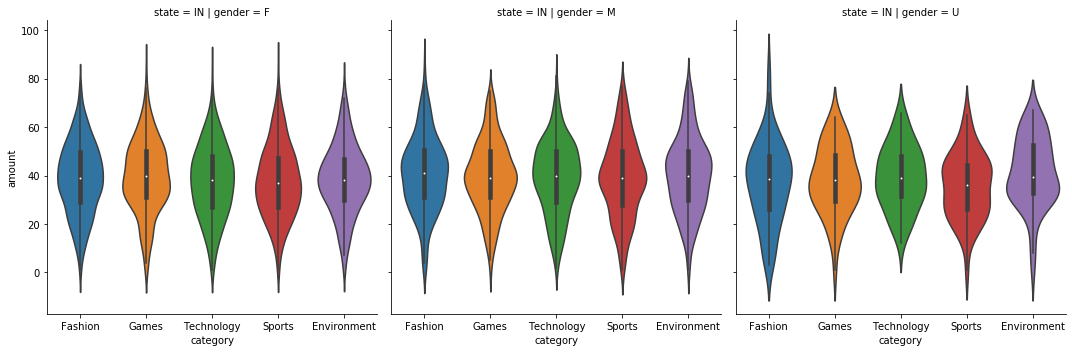

In [21]:
d=df.loc[df['state'] =='IN']
sns.catplot(y='amount',x='category',row='state',col='gender',kind='violin',data=d)

we can just change the name of state which we want to view  and then grill the data accordingly